In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.DiGraph()

# Create an empty graph 
G.clear()

# Define the _____ dictionary (code, name)


# Add nodes with attributes (person ID, ...)
# Still need to add attributes
G.add_node('A', gender='female', age=40, employee_class='', employee_type='', job_family='', position_title='', bu='corporate', division='', subdivision='', department='', tenure='',critical_core='', job_level='', supervisor_id='')
G.add_node('B', gender='female', age=28, employee_class='', employee_type='', job_family='', position_title='', bu='corporate', division='', subdivision='', department='', tenure='',critical_core='', job_level='', supervisor_id='A')
G.add_node('C', gender='male', age=45, employee_class='', employee_type='', job_family='', position_title='', bu='corporate', division='', subdivision='', department='', tenure='',critical_core='', job_level='', supervisor_id='')
G.add_node('D', gender='male', age=38, employee_class='', employee_type='', job_family='', position_title='', bu='TEK', division='', subdivision='', department='', tenure='',critical_core='', job_level='', supervisor_id='')

In [17]:
def add_bidirectional_relationship(G, node1, node2, relationship):
    # Add the relationship from node1 to node2
    add_relationship(G, node1, node2, relationship)
    # Add the relationship from node2 to node1
    add_relationship(G, node2, node1, relationship)

def add_unidirectional_relationship(G, node1, node2, relationship):
    # Add the relationship from node1 to node2
    add_relationship(G, node1, node2, relationship)

def add_relationship(G, node1, node2, relationship):
    if G.has_edge(node1, node2):
        # Get the current relationship of the edge
        current_relationship = G[node1][node2].get('relationship', [])
        if isinstance(current_relationship, list):
            current_relationship.append(relationship)
        else:
            current_relationship = [current_relationship, relationship]
    else:
        current_relationship = [relationship]
        G.add_edge(node1, node2)

    # Set the new relationship to the edge
    G[node1][node2]['relationship'] = current_relationship

In [18]:
# Add relationships
add_bidirectional_relationship(G, 'A', 'B', 'same_department')
add_bidirectional_relationship(G, 'A', 'C', 'same_department')
add_bidirectional_relationship(G, 'B', 'C', 'same_department')

# Add 'is_manager' relationship if 'supervisorid' is not None
nodes = list(G.nodes(data=True))  # Create a copy of the node list
for node, data in nodes:
    supervisorid = data.get('supervisor_id')
    if supervisorid and supervisorid != '':
        add_unidirectional_relationship(G, supervisorid, node, 'is_manager')

# Print the edges with their attributes
print(G.edges(data=True))

[('A', 'B', {'relationship': ['same_department', 'is_manager']}), ('A', 'C', {'relationship': ['same_department']}), ('B', 'A', {'relationship': ['same_department']}), ('B', 'C', {'relationship': ['same_department']}), ('C', 'A', {'relationship': ['same_department']}), ('C', 'B', {'relationship': ['same_department']})]


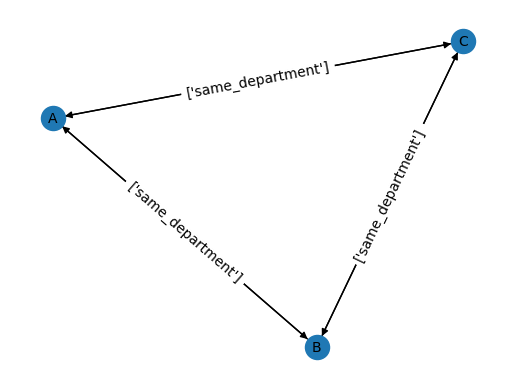

In [25]:
# Show the same_department relationship within nodes that belong to the corporate BU.

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
corporate_nodes = [node for node, data in G.nodes(data=True) if data.get('bu') == 'corporate']
nx.draw_networkx_nodes(G, pos, nodelist=corporate_nodes, node_size=300)

# edges
edges = [(u, v) for u, v, d in G.edges(data=True) if 'same_department' in d['relationship']]
nx.draw_networkx_edges(G, pos, edgelist=edges)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# edge labels
edge_labels = nx.get_edge_attributes(G, 'relationship')
edge_labels = {k: [rel for rel in v if rel == 'same_department'] for k, v in edge_labels.items() if k in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

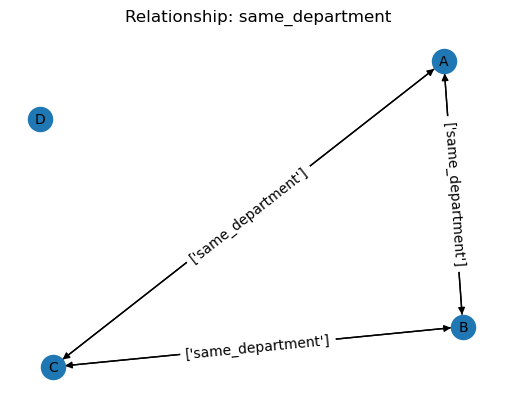

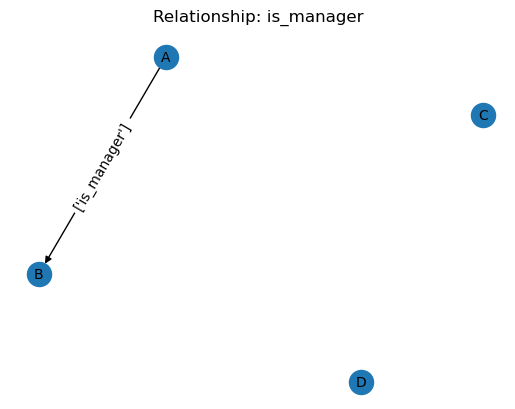

In [20]:
# Get all unique relationships in the graph
relationships = set()
for u, v, d in G.edges(data=True):
    relationships.update(d['relationship'])
relationships_to_display = list(relationships)

for relationship in relationships_to_display:
    # Draw the graph
    pos = nx.spring_layout(G, k=10)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=300)

    # edges
    edges = [(u, v) for u, v, d in G.edges(data=True) if relationship in d['relationship']]
    nx.draw_networkx_edges(G, pos, edgelist=edges)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    # edge labels
    edge_labels = nx.get_edge_attributes(G, 'relationship')
    edge_labels = {k: [rel for rel in v if rel == relationship] for k, v in edge_labels.items() if k in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"Relationship: {relationship}")
    plt.axis('off')
    plt.show()

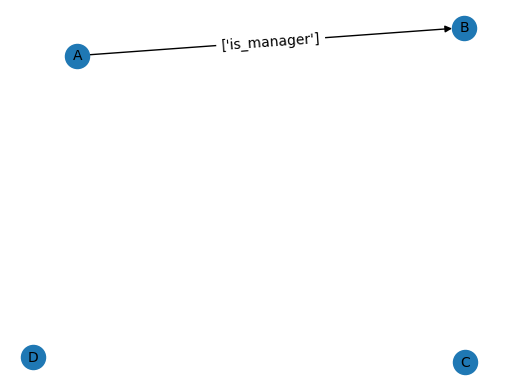

In [21]:
# Show the is_manager relationship 

# Draw the graph
pos = nx.spring_layout(G, k=10)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
edges = [(u, v) for u, v, d in G.edges(data=True) if 'is_manager' in d['relationship']]
nx.draw_networkx_edges(G, pos, edgelist=edges)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# edge labels
edge_labels = nx.get_edge_attributes(G, 'relationship')
edge_labels = {k: [rel for rel in v if rel == 'is_manager'] for k, v in edge_labels.items() if k in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

In [24]:
# print the nodes with their attributes
print(G.nodes(data=True))

# Print the nodes with their BU attribute
for node, data in G.nodes(data=True):
    print(f"Node: {node}, BU: {data.get('bu')}, Supervisor ID: {data.get('supervisor_id')}")

[('A', {'gender': 'female', 'age': 40, 'employee_class': '', 'employee_type': '', 'job_family': '', 'position_title': '', 'bu': 'corporate', 'division': '', 'subdivision': '', 'department': '', 'tenure': '', 'critical_core': '', 'job_level': '', 'supervisor_id': ''}), ('B', {'gender': 'female', 'age': 28, 'employee_class': '', 'employee_type': '', 'job_family': '', 'position_title': '', 'bu': 'corporate', 'division': '', 'subdivision': '', 'department': '', 'tenure': '', 'critical_core': '', 'job_level': '', 'supervisor_id': 'A'}), ('C', {'gender': 'male', 'age': 45, 'employee_class': '', 'employee_type': '', 'job_family': '', 'position_title': '', 'bu': 'corporate', 'division': '', 'subdivision': '', 'department': '', 'tenure': '', 'critical_core': '', 'job_level': '', 'supervisor_id': ''}), ('D', {'gender': 'male', 'age': 38, 'employee_class': '', 'employee_type': '', 'job_family': '', 'position_title': '', 'bu': 'TEK', 'division': '', 'subdivision': '', 'department': '', 'tenure': '